# Receiver Operating Characteristic (ROC Curve) #

ROC is a plot signal (True Positive Rate) against noise (False Positive Rate). The model performance is determined by looking at the area under the ROC curve ( or AUC = Area Under The Curve )

## How to construct ROC curve ##

### 1. import the data ###

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('Data/health_sick.csv')
print(df.head())
def offset_healthy(df, offset):
    mask = df.A=='Healthy'
    df.loc[mask, 'B']=df.loc[mask, 'B'] + offset
offset_healthy(df,12)

         A          B
0  Healthy  13.203864
1  Healthy   4.457589
2  Healthy  19.404121
3     Sick   4.530985
4  Healthy  10.433462


### 2. Verify how much Sick and Healthy people are in the database ###

### 3. Plot concentration values in a scatter plot with healthy(sick) people in green(red) ###

### 4. Plot histogram of sick (healhty) people with 10 bins ###

### 5. sort dataframe against concentration value ### 

### 6. Compute ROC point ###
1. defines a threshold an create a series with predicted values
1. Computes the confustion matrix, put True positive, True Negative, False Positive, and False Negative in variables
1. Computes the False Positive Ratio, and the True Positive Ratio
1. test it for different threshold
1. Think of way to plot the ROC curve

In [20]:
# verifying how much sick or healthy people are in the database
n_sick= df[df['A']=='Sick']['A'].count()
n_healthy = df[df['A']=='Healthy']['A'].count()
n_sick
total = n_sick + n_healthy
n_sick, n_healthy

(81, 159)

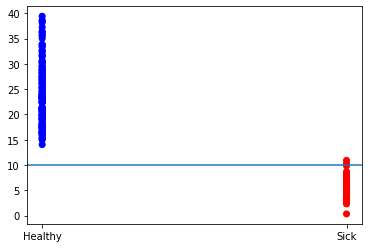

In [39]:

cs = ['red' if i =="Sick" else 'blue' for i in df['A']]
plt.scatter(df['A'], df['B'], color = cs)

plt.axhline(y =10)

## 4. Plot histogram of sick (healhty) people with 10 bins

array([[<AxesSubplot:title={'center':'B'}>]], dtype=object)

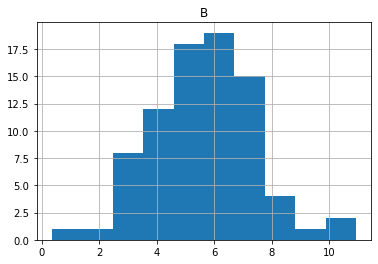

In [28]:
df[df.A=='Sick'].hist(bins =10)

# 5. sort dataframe against concentration value

In [36]:
df_sort = df.sort_values(by='B')

# 6. Compute ROC point

In [43]:
from sklearn.metrics import confusion_matrix
def predictor(df_sort, threshold):
        p=['Sick' if x < threshold else 'Healthy' for x in df_sort['B']]
        return p
    
threshold = 10
p = predictor(df_sort, threshold)
confusion = confusion_matrix( p, df_sort['A'], labels = ['Healthy', 'Sick'])
TP = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]
TN = confusion[1,1]
FPF = FP/(FP+TN)
TPF = TP/(TP+FN)